# Quick demo of fitting linear regression via gradient descent


In [1]:
# imports and setup
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import math

import pandas as pd

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

# Create simple dataset:   y = 4.2 * x + noise

In [2]:
def create_dataset(N=100, slope=4.2, noise_stddev=0.1, random_state=0):
    random_state = np.random.RandomState(int(random_state))
    x_N = np.linspace(-2, 2, N)
    
    y_N = slope * x_N + random_state.randn(N) * noise_stddev
    
    return x_N, y_N

In [5]:
x_N, y_N = create_dataset(N=50, noise_stddev=0.3)

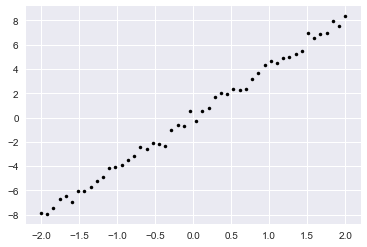

In [7]:
plt.plot(x_N, y_N, 'k.');

## Define loss function

In [31]:
def calc_loss(w):
    yhat_N = x_N * w
    sum_squared_error = 0.5 * np.sum(np.square(y_N - yhat_N))
    return sum_squared_error

In [32]:
def calc_grad(w):
    grad = np.sum(w * np.square(x_N) - x_N * y_N)
    return grad

In [33]:
w_grid = np.linspace(0, 8, 100)

## Sanity check: plot loss evaluated at each w from 0 to 8

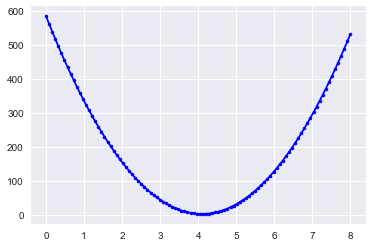

In [34]:
loss_grid = [calc_loss(w) for w in w_grid]
plt.plot(w_grid, loss_grid, 'b.-')

## Sanity check: plot gradient evaluated at each w from 0 to 8

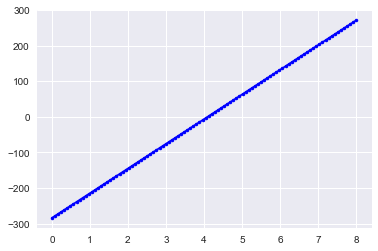

In [35]:
grad_grid = [calc_grad(w) for w in w_grid]
plt.plot(w_grid, grad_grid, 'b.-')

### Define minimize_via_grad_descent algorithm

In [58]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0.0, step_size=0.001, max_iters=100):
    w = np.asarray(init_w).copy()
    
    trace_loss_list = []
    trace_w_list = []
    trace_grad_list = []
    grad = np.nan
    for iter_id in range(max_iters):
        if iter_id > 0:
            grad = calc_grad(w)    
            w = w - step_size * grad
        loss = calc_loss(w)
    
        print("  iter %5d/%d | loss % 13.4f | w  % 13.5f" % (iter_id, max_iters, loss, w))
    
        trace_loss_list.append(loss)
        trace_w_list.append(w)
        trace_grad_list.append(grad)
        
    wopt = w
    return wopt, dict(trace_loss_list=trace_loss_list, trace_w_list=trace_w_list, trace_grad_list=trace_grad_list)

## Try with step_size = 0.0001

In [59]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.001);

  iter     0/100 | loss      584.0407 | w        0.00000
  iter     1/100 | loss      506.1378 | w        0.28408
  iter     2/100 | loss      438.6709 | w        0.54845
  iter     3/100 | loss      380.2418 | w        0.79448
  iter     4/100 | loss      329.6400 | w        1.02343
  iter     5/100 | loss      285.8168 | w        1.23650
  iter     6/100 | loss      247.8643 | w        1.43479
  iter     7/100 | loss      214.9958 | w        1.61931
  iter     8/100 | loss      186.5305 | w        1.79103
  iter     9/100 | loss      161.8784 | w        1.95084
  iter    10/100 | loss      140.5287 | w        2.09956
  iter    11/100 | loss      122.0391 | w        2.23796
  iter    12/100 | loss      106.0263 | w        2.36675
  iter    13/100 | loss       92.1586 | w        2.48661
  iter    14/100 | loss       80.1487 | w        2.59815
  iter    15/100 | loss       69.7476 | w        2.70196
  iter    16/100 | loss       60.7398 | w        2.79856
  iter    17/100 | loss       5

(0, 100)

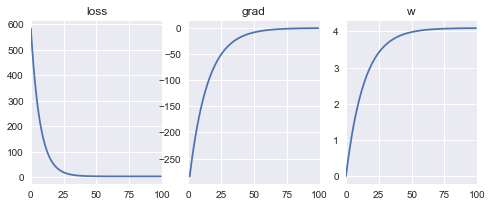

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(8,3))

axes[0].plot(info_dict['trace_loss_list']);
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list']);
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list']);
axes[2].set_title('w');

plt.xlim([0, 100])

# Try with step_size = 0.02

In [61]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.02);

  iter     0/100 | loss      584.0407 | w        0.00000
  iter     1/100 | loss       89.9420 | w        5.68165
  iter     2/100 | loss       15.6522 | w        3.47856
  iter     3/100 | loss        4.4825 | w        4.33282
  iter     4/100 | loss        2.8031 | w        4.00158
  iter     5/100 | loss        2.5506 | w        4.13002
  iter     6/100 | loss        2.5126 | w        4.08021
  iter     7/100 | loss        2.5069 | w        4.09952
  iter     8/100 | loss        2.5060 | w        4.09204
  iter     9/100 | loss        2.5059 | w        4.09494
  iter    10/100 | loss        2.5059 | w        4.09381
  iter    11/100 | loss        2.5059 | w        4.09425
  iter    12/100 | loss        2.5059 | w        4.09408
  iter    13/100 | loss        2.5059 | w        4.09415
  iter    14/100 | loss        2.5059 | w        4.09412
  iter    15/100 | loss        2.5059 | w        4.09413
  iter    16/100 | loss        2.5059 | w        4.09413
  iter    17/100 | loss        

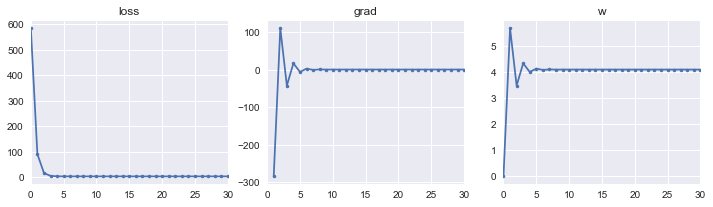

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(12,3))

axes[0].plot(info_dict['trace_loss_list'], '.-');
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list'], '.-');
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list'], '.-');
axes[2].set_title('w');

plt.xlim([0, 30]);